In [1]:
import keras
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix
import seaborn as sns
import scipy.stats

Using TensorFlow backend.


In [2]:
JETS_TO_USE = 4

combined_variables_list = ["FTALepton{}_pt".format(i) for i in [1, 2]]
combined_variables_list = combined_variables_list + ["FTAJet{}__nom_pt".format(i) for i in range(1, JETS_TO_USE + 1)] 
combined_variables_list = combined_variables_list + ["FTAJet{}__nom_DeepJetB".format(i) for i in range(1, JETS_TO_USE + 1)]
combined_variables_list = combined_variables_list + ["HT__nom", "HTRat__nom", "HTH__nom", "HTb__nom", \
                                                     "nMediumDeepJetB__nom", "nFTAJet__nom", "sphericity", "isElMu"]

individual_variables_list = combined_variables_list[:-1]

combined_variables_list_sorted = ["FTALepton{}_pt".format(i) for i in [1, 2]]
combined_variables_list_sorted = combined_variables_list_sorted + ["FTAJet{}__nom_pt".format(i) for i in range(1, JETS_TO_USE + 1)] 
combined_variables_list_sorted = combined_variables_list_sorted + ["FTAJet{}__nom_DeepJetB_sorted".format(i) for i in range(1, JETS_TO_USE + 1)]
combined_variables_list_sorted = combined_variables_list_sorted + ["HT__nom", "HTRat__nom", "HTH__nom", "HTb__nom", \
                                                            "nMediumDeepJetB__nom", "nFTAJet__nom", "sphericity", "isElMu"]

individual_variables_list_sorted = combined_variables_list_sorted[:-1]

In [3]:
formal_dictionary={'FTALepton1_pt': 'lepton pT 1',
 'FTALepton2_pt': 'lepton pT 2',
 'FTAJet1__nom_pt': 'jet pT 1',
 'FTAJet2__nom_pt': 'jet pT 2',
 'FTAJet3__nom_pt': 'jet pT 3',
 'FTAJet4__nom_pt': 'jet pT 4',
 'FTAJet1__nom_DeepJetB_sorted': 'sorted DeepJetB 1',
 'FTAJet2__nom_DeepJetB_sorted': 'sorted DeepJetB 2',
 'FTAJet3__nom_DeepJetB_sorted': 'sorted DeepJetB 3',
 'FTAJet4__nom_DeepJetB_sorted': 'sorted DeepJetB 4',
 'HT__nom': 'HT',
 'HTRat__nom': 'HTRat',
 'HTH__nom': 'HTH',
 'HTb__nom': 'HTb',
 'nMediumDeepJetB__nom': 'nMediumDeepJetB',
 'nFTAJet__nom': 'nJets',
 'sphericity': 'sphericity',
 'isElMu': 'is elmu type'}

In [4]:
model = keras.models.load_model("v4_sorted_tanh/OSDL_keras_v4_sorted_tanh_combined-181-0.05.hdf5")

input_data = pd.read_pickle("train_dataset.p")
input_data = input_data[input_data["target"] <= 1]
input_data["target_new"] = 1 - input_data["target"]
input_data = input_data.sample(frac = 1., random_state=42)

ElMu_input_data = input_data[input_data["isElMu"] == 1]
MuMu_input_data = input_data[input_data["isMuMu"] == 1]

combined_training_size = 35000
combined_training_input = pd.concat([input_data[input_data["target"]==target].iloc[:combined_training_size] for target in range(2)])
combined_testing_input  = pd.concat([input_data[input_data["target"]==target].iloc[combined_training_size:] for target in range(2)])

W0928 19:02:07.673325 139867438589760 deprecation_wrapper.py:119] From /cvmfs/sft.cern.ch/lcg/views/LCG_97apython3/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0928 19:02:07.842720 139867438589760 deprecation_wrapper.py:119] From /cvmfs/sft.cern.ch/lcg/views/LCG_97apython3/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0928 19:02:07.844094 139867438589760 deprecation_wrapper.py:119] From /cvmfs/sft.cern.ch/lcg/views/LCG_97apython3/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0928 19:02:07.879780 139867438589760 deprecation.py:506] From /cvmfs/sft.cern.ch/l

In [19]:
def discriminator_distrib(modelname, isCombined=False, isElMu=True, legend=True, customname="", variant=1):
    model = keras.models.load_model(modelname)
    
    if variant == 1 or variant == 2:
        if isCombined:
            train_ttbar_output = model.predict(combined_training_input[combined_training_input["target"]==1][combined_variables_list])
            train_tttt_output  = model.predict(combined_training_input[combined_training_input["target"]==0][combined_variables_list])
            test_ttbar_output = model.predict(combined_testing_input[combined_testing_input["target"]==1][combined_variables_list])
            test_tttt_output  = model.predict(combined_testing_input[combined_testing_input["target"]==0][combined_variables_list])
        elif isElMu:
            train_ttbar_output = model.predict(ElMu_training_input[ElMu_training_input["target"]==1][individual_variables_list])
            train_tttt_output  = model.predict(ElMu_training_input[ElMu_training_input["target"]==0][individual_variables_list])
            test_ttbar_output = model.predict(ElMu_testing_input[ElMu_testing_input["target"]==1][individual_variables_list])
            test_tttt_output  = model.predict(ElMu_testing_input[ElMu_testing_input["target"]==0][individual_variables_list])
        else:
            train_ttbar_output = model.predict(MuMu_training_input[MuMu_training_input["target"]==1][individual_variables_list])
            train_tttt_output  = model.predict(MuMu_training_input[MuMu_training_input["target"]==0][individual_variables_list])
            test_ttbar_output = model.predict(MuMu_testing_input[MuMu_testing_input["target"]==1][individual_variables_list])
            test_tttt_output  = model.predict(MuMu_testing_input[MuMu_testing_input["target"]==0][individual_variables_list])
    elif variant == 3 or variant == 4:
        if isCombined:
            train_ttbar_output = model.predict(combined_training_input[combined_training_input["target"]==1][combined_variables_list_sorted])
            train_tttt_output  = model.predict(combined_training_input[combined_training_input["target"]==0][combined_variables_list_sorted])
            test_ttbar_output = model.predict(combined_testing_input[combined_testing_input["target"]==1][combined_variables_list_sorted])
            test_tttt_output  = model.predict(combined_testing_input[combined_testing_input["target"]==0][combined_variables_list_sorted])
        elif isElMu:
            train_ttbar_output = model.predict(ElMu_training_input[ElMu_training_input["target"]==1][individual_variables_list_sorted])
            train_tttt_output  = model.predict(ElMu_training_input[ElMu_training_input["target"]==0][individual_variables_list_sorted])
            test_ttbar_output = model.predict(ElMu_testing_input[ElMu_testing_input["target"]==1][individual_variables_list_sorted])
            test_tttt_output  = model.predict(ElMu_testing_input[ElMu_testing_input["target"]==0][individual_variables_list_sorted])
        else:
            train_ttbar_output = model.predict(MuMu_training_input[MuMu_training_input["target"]==1][individual_variables_list_sorted])
            train_tttt_output  = model.predict(MuMu_training_input[MuMu_training_input["target"]==0][individual_variables_list_sorted])
            test_ttbar_output = model.predict(MuMu_testing_input[MuMu_testing_input["target"]==1][individual_variables_list_sorted])
            test_tttt_output  = model.predict(MuMu_testing_input[MuMu_testing_input["target"]==0][individual_variables_list_sorted])

    plt.hist(train_ttbar_output, range=(0, 1), bins=20, label="training ttbar", histtype="step", density=1.)
    plt.hist(train_tttt_output, range=(0, 1), bins=20,  label="training tttt",  histtype="step", density=1.)
    plt.hist(test_ttbar_output, range=(0, 1), bins=20,  label="testing ttbar",  histtype="step", density=1.)
    plt.hist(test_tttt_output, range=(0, 1), bins=20,   label="testing tttt",   histtype="step", density=1.)

    if legend: plt.legend()
    plt.title(customname if customname != "" else modelname)

(0, 7)

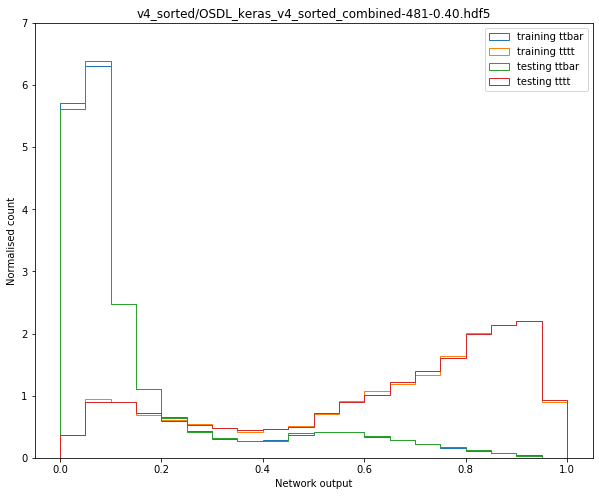

In [9]:
plt.figure(figsize=(10, 8), facecolor="white")
discriminator_distrib("v4_sorted/OSDL_keras_v4_sorted_combined-481-0.40.hdf5", isCombined=True, variant=3)
plt.gca().set_xlabel("Network output")
plt.gca().set_ylabel("Normalised count")
plt.gca().set_ylim(0, 7)

Text(0.5, 1.0, 'Output distribution of best neural network with tanh activation and and sorted DeepJeetB, dropout = 0.35')

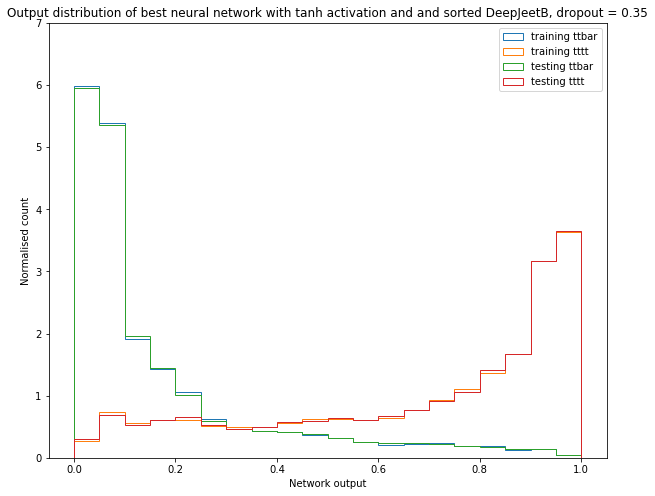

In [20]:
plt.figure(figsize=(10, 8), facecolor="white")
discriminator_distrib("v4_sorted_tanh/OSDL_keras_v4_sorted_tanh_combined-270-0.35.hdf5", isCombined=True, variant=4)
plt.gca().set_xlabel("Network output")
plt.gca().set_ylabel("Normalised count")
plt.gca().set_ylim(0, 7)
plt.title("Output distribution of best neural network with tanh activation and and sorted DeepJeetB, dropout = 0.35")

(0, 7)

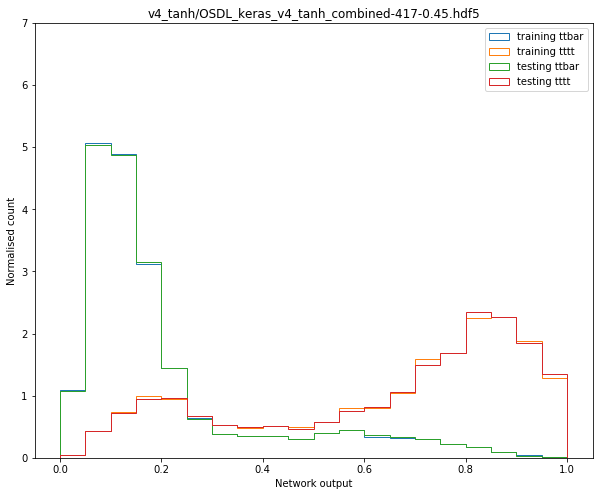

In [10]:
plt.figure(figsize=(10, 8), facecolor="white")
discriminator_distrib("v4_tanh/OSDL_keras_v4_tanh_combined-417-0.45.hdf5", isCombined=True, variant=2)
plt.gca().set_xlabel("Network output")
plt.gca().set_ylabel("Normalised count")
plt.gca().set_ylim(0, 7)

(0, 7)

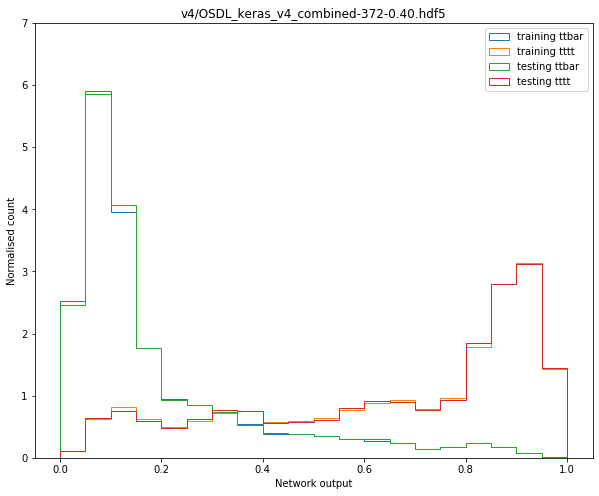

In [11]:
plt.figure(figsize=(10, 8), facecolor="white")
discriminator_distrib("v4/OSDL_keras_v4_combined-372-0.40.hdf5", isCombined=True, variant=1)
plt.gca().set_xlabel("Network output")
plt.gca().set_ylabel("Normalised count")
plt.gca().set_ylim(0, 7)

In [23]:
def AUC_from_model(modelname, variables_list, isCombined=False, isElMu=True, legend=True, train_curve=True, test_curve=True, customname=""):
    model = keras.models.load_model(modelname)
    
    if not train_curve and not test_curve:
        raise Exception("At least train_curve or test_curve must be True.")
    if isCombined:
        if train_curve:
            train_ttbar_output = model.predict(combined_training_input[combined_training_input["target"]==1][variables_list])
            train_tttt_output  = model.predict(combined_training_input[combined_training_input["target"]==0][variables_list])
        if test_curve:
            test_ttbar_output = model.predict(combined_testing_input[combined_testing_input["target"]==1][variables_list])
            test_tttt_output  = model.predict(combined_testing_input[combined_testing_input["target"]==0][variables_list])
    elif isElMu:
        if train_curve:
            train_ttbar_output = model.predict(ElMu_training_input[ElMu_training_input["target"]==1][variables_list])
            train_tttt_output  = model.predict(ElMu_training_input[ElMu_training_input["target"]==0][variables_list])
        if test_curve:
            test_ttbar_output = model.predict(ElMu_testing_input[ElMu_testing_input["target"]==1][variables_list])
            test_tttt_output  = model.predict(ElMu_testing_input[ElMu_testing_input["target"]==0][variables_list])
    else:
        if train_curve:
            train_ttbar_output = model.predict(MuMu_training_input[MuMu_training_input["target"]==1][variables_list])
            train_tttt_output  = model.predict(MuMu_training_input[MuMu_training_input["target"]==0][variables_list])
        if test_curve:
            test_ttbar_output = model.predict(MuMu_testing_input[MuMu_testing_input["target"]==1][variables_list])
            test_tttt_output  = model.predict(MuMu_testing_input[MuMu_testing_input["target"]==0][variables_list])

    train_sig_acceptance_list = [0]
    test_sig_acceptance_list = [0]
    
    if train_curve:
        train_ttbar_sorted = np.sort(train_ttbar_output, axis=None)
        train_tttt_sorted  = np.sort(train_tttt_output, axis=None)
    if test_curve:
        test_ttbar_sorted  = np.sort(test_ttbar_output, axis=None)
        test_tttt_sorted   = np.sort(test_tttt_output, axis=None)
    for i in range(1, 50):
        if train_curve:
            train_bg_cut = train_ttbar_sorted[int(len(train_ttbar_sorted)*(1-i/50))]
            train_sig_acceptance = np.count_nonzero(train_tttt_sorted > train_bg_cut)/len(train_tttt_sorted)
            train_sig_acceptance_list.append(train_sig_acceptance)
        if test_curve:
            test_bg_cut = test_ttbar_sorted[int(len(test_ttbar_sorted)*(1-i/50))]
            test_sig_acceptance = np.count_nonzero(test_tttt_sorted > test_bg_cut)/len(test_tttt_sorted)
            test_sig_acceptance_list.append(test_sig_acceptance)
    
    if train_curve: train_sig_acceptance_list.append(1)
    if test_curve: test_sig_acceptance_list.append(1)
    
    train_AUC = 0
    test_AUC  = 0
    for i in range(50):
        if train_curve: train_AUC += (train_sig_acceptance_list[i] + train_sig_acceptance_list[i+1])*(1/50)/2
        if test_curve: test_AUC += (test_sig_acceptance_list[i] + test_sig_acceptance_list[i+1])*(1/50)/2
    
    if train_curve: 
        #print(train_AUC)
        plt.plot([i/50 for i in range(0, 51)], train_sig_acceptance_list, \
                 label="training {}, {:.3f}".format(customname if customname != "" else modelname, train_AUC))
    if test_curve: 
        #print(test_AUC)
        plt.plot([i/50 for i in range(0, 51)], test_sig_acceptance_list, \
                 label="testing {}, {:.3f}".format(customname if customname != "" else modelname, test_AUC))
    
    if legend: plt.legend()
    return train_AUC, test_AUC

Text(0.5, 1.0, 'ROC curve for best neural network with ReLU activation, dropout = 0.40, difference = 0.000014')

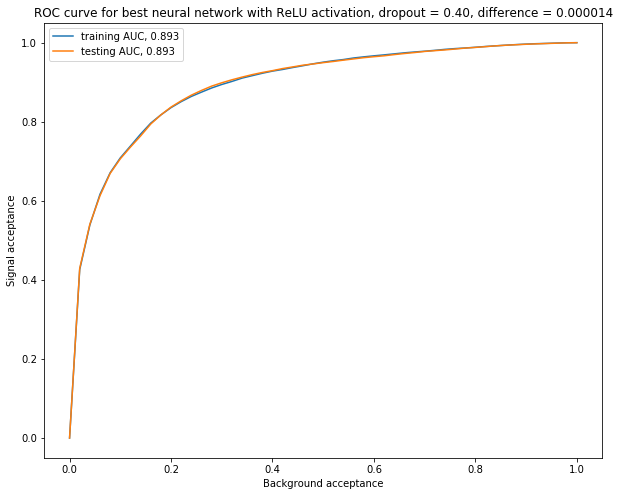

In [24]:
plt.figure(figsize=(10, 8), facecolor="white")
train_AUC, test_AUC = AUC_from_model("v4/OSDL_keras_v4_combined-372-0.40.hdf5", combined_variables_list, isCombined=True, customname="AUC")
plt.gca().set_xlabel("Background acceptance")
plt.gca().set_ylabel("Signal acceptance")
plt.title("ROC curve for best neural network with ReLU activation, dropout = 0.40, difference = {:.6f}".format(abs(train_AUC-test_AUC)))

Text(0.5, 1.0, 'ROC curve for best neural network with tanh activation, dropout = 0.45, difference = 0.000127')

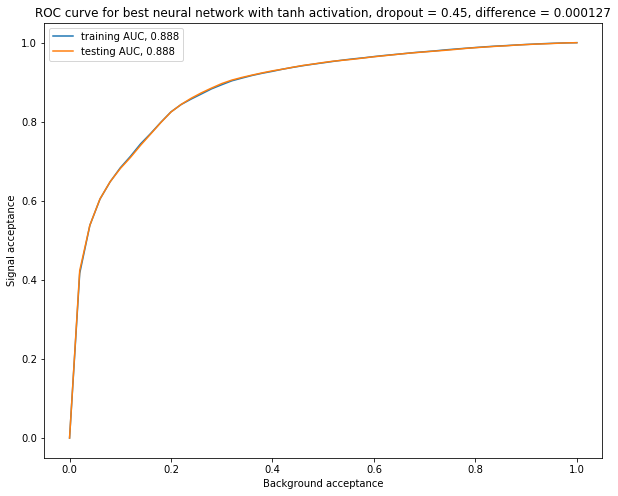

In [25]:
plt.figure(figsize=(10, 8), facecolor="white")
train_AUC, test_AUC = AUC_from_model("v4_tanh/OSDL_keras_v4_tanh_combined-417-0.45.hdf5", combined_variables_list, isCombined=True, customname="AUC")
plt.gca().set_xlabel("Background acceptance")
plt.gca().set_ylabel("Signal acceptance")
plt.title("ROC curve for best neural network with tanh activation, dropout = 0.45, difference = {:.6f}".format(abs(train_AUC-test_AUC)))

Text(0.5, 1.0, 'ROC curve for best neural network with ReLU activation and sorted DeepJetB, dropout = 0.40, difference = 0.000162')

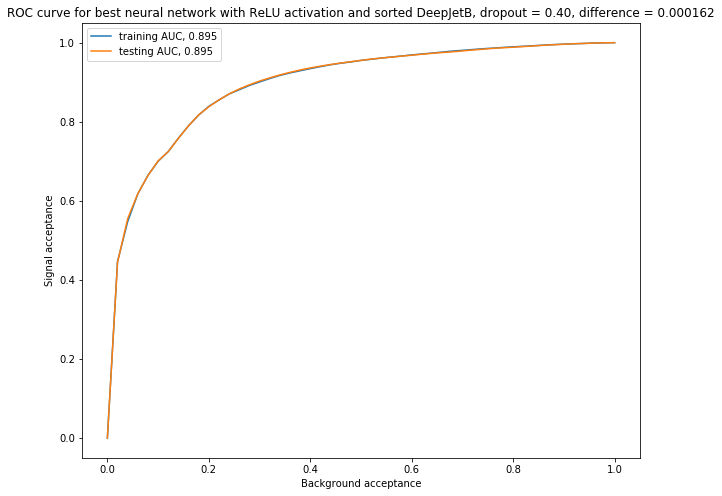

In [26]:
plt.figure(figsize=(10, 8), facecolor="white")
train_AUC, test_AUC = AUC_from_model("v4_sorted/OSDL_keras_v4_sorted_combined-481-0.40.hdf5", combined_variables_list_sorted, isCombined=True, customname="AUC")
plt.gca().set_xlabel("Background acceptance")
plt.gca().set_ylabel("Signal acceptance")
plt.title("ROC curve for best neural network with ReLU activation and sorted DeepJetB, dropout = 0.40, difference = {:.6f}".format(abs(train_AUC-test_AUC)))

Text(0.5, 1.0, 'ROC curve for best neural network with tanh activation and sorted DeepJeetB, dropout = 0.35, difference = 0.000013')

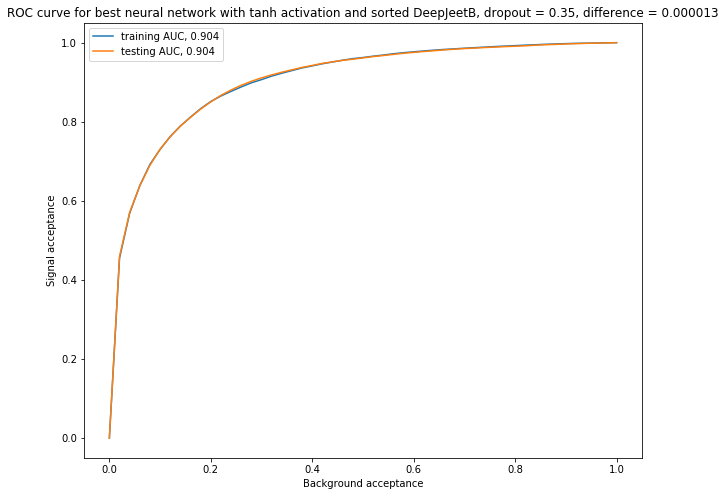

In [27]:
plt.figure(figsize=(10, 8), facecolor="white")
train_AUC, test_AUC = AUC_from_model("v4_sorted_tanh/OSDL_keras_v4_sorted_tanh_combined-270-0.35.hdf5", combined_variables_list_sorted, isCombined=True, customname="AUC")
plt.gca().set_xlabel("Background acceptance")
plt.gca().set_ylabel("Signal acceptance")
plt.title("ROC curve for best neural network with tanh activation and sorted DeepJeetB, dropout = 0.35, difference = {:.6f}".format(abs(train_AUC-test_AUC)))

Text(0.5, 1, 'Correlation matrix between variables in signal events')

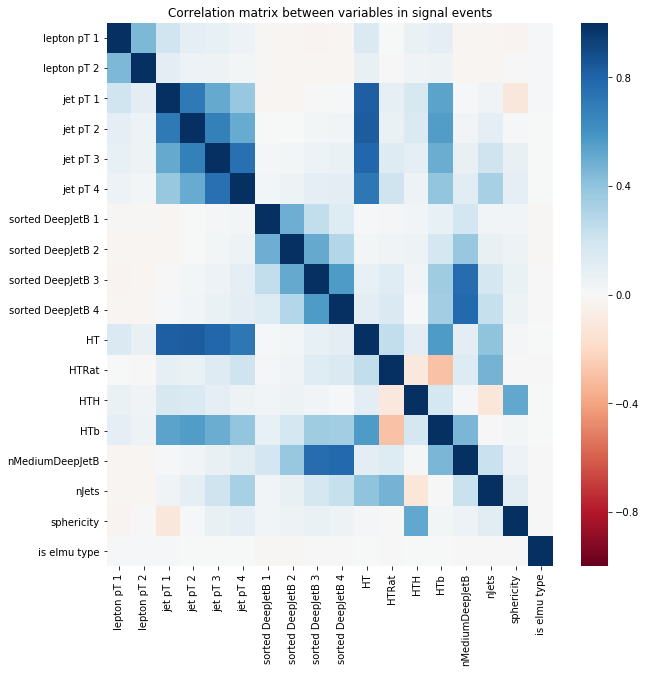

In [14]:
plt.figure(figsize=(10, 10), facecolor="white")
sns.heatmap(input_data[input_data["target"]==0][combined_variables_list_sorted].corr(), cmap="RdBu", vmin=-1, vmax=1,\
            xticklabels=formal_dictionary.values(), yticklabels=formal_dictionary.values())
plt.title("Correlation matrix between variables in signal events")

Text(0.5, 1, 'Correlation matrix between variables in background events')

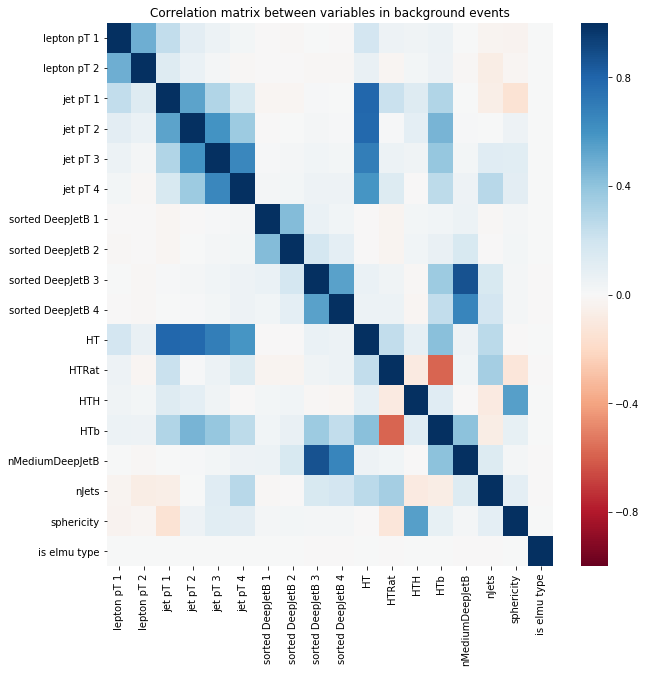

In [17]:
plt.figure(figsize=(10, 10), facecolor="white")
sns.heatmap(input_data[input_data["target"]==1][combined_variables_list_sorted].corr(), cmap="RdBu", vmin=-1, vmax=1, \
            xticklabels=formal_dictionary.values(), yticklabels=formal_dictionary.values())
plt.title("Correlation matrix between variables in background events")

In [7]:
training_ttbar = combined_training_input[combined_training_input["target_new"] == 0][combined_variables_list].to_numpy()
training_tttt  = combined_training_input[combined_training_input["target_new"] == 1][combined_variables_list].to_numpy()
testing_ttbar  = combined_testing_input[combined_testing_input["target_new"] == 0][combined_variables_list].to_numpy()
testing_tttt   = combined_testing_input[combined_testing_input["target_new"] == 1][combined_variables_list].to_numpy()

def first_order_gradient(model, varlist):
    gradients = keras.backend.gradients(model.output, model.layers[1].output)
    sess = keras.backend.get_session()
    first_order_gradients_training_ttbar = sess.run(gradients[0], feed_dict={model.input: training_ttbar})
    first_order_gradients_training_tttt  = sess.run(gradients[0], feed_dict={model.input: training_tttt})
    first_order_gradients_testing_ttbar = sess.run(gradients[0], feed_dict={model.input: testing_ttbar})
    first_order_gradients_testing_tttt  = sess.run(gradients[0], feed_dict={model.input: testing_tttt})
    
    first_order_gradients_mean_training_ttbar = first_order_gradients_training_ttbar.mean(axis=0)
    first_order_gradients_mean_training_tttt  = first_order_gradients_training_tttt.mean(axis=0)
    first_order_gradients_mean_testing_ttbar = first_order_gradients_testing_ttbar.mean(axis=0)
    first_order_gradients_mean_testing_tttt  = first_order_gradients_testing_tttt.mean(axis=0)
    
    first_order_gradients_df = pd.DataFrame(varlist, columns=["combined_variables_list"])
    first_order_gradients_df["training_ttbar"] = abs(first_order_gradients_mean_training_ttbar)
    first_order_gradients_df["testing_ttbar"] = abs(first_order_gradients_mean_testing_ttbar)
    first_order_gradients_df["training_tttt"]  = abs(first_order_gradients_mean_training_tttt)
    first_order_gradients_df["testing_tttt"]  = abs(first_order_gradients_mean_testing_tttt)
    
    plt.figure(figsize=(10, 8), facecolor="white")
    sns.barplot(x="combined_variables_list", y="value", hue="variable", data=pd.melt(first_order_gradients_df, id_vars=["combined_variables_list"]))
    plt.title("First order gradients for respective normalised inputs")
    plt.xlabel("")
    plt.ylabel("First order gradient absolute value")
    plt.xticks(rotation=-90)
    
    return first_order_gradients_df

[Text(0, 0, 'lepton pT 1'),
 Text(0, 0, 'lepton pT 2'),
 Text(0, 0, 'jet pT 1'),
 Text(0, 0, 'jet pT 2'),
 Text(0, 0, 'jet pT 3'),
 Text(0, 0, 'jet pT 4'),
 Text(0, 0, 'sorted DeepJetB 1'),
 Text(0, 0, 'sorted DeepJetB 2'),
 Text(0, 0, 'sorted DeepJetB 3'),
 Text(0, 0, 'sorted DeepJetB 4'),
 Text(0, 0, 'HT'),
 Text(0, 0, 'HTRat'),
 Text(0, 0, 'HTH'),
 Text(0, 0, 'HTb'),
 Text(0, 0, 'nMediumDeepJetB'),
 Text(0, 0, 'nJets'),
 Text(0, 0, 'sphericity'),
 Text(0, 0, 'is elmu type')]

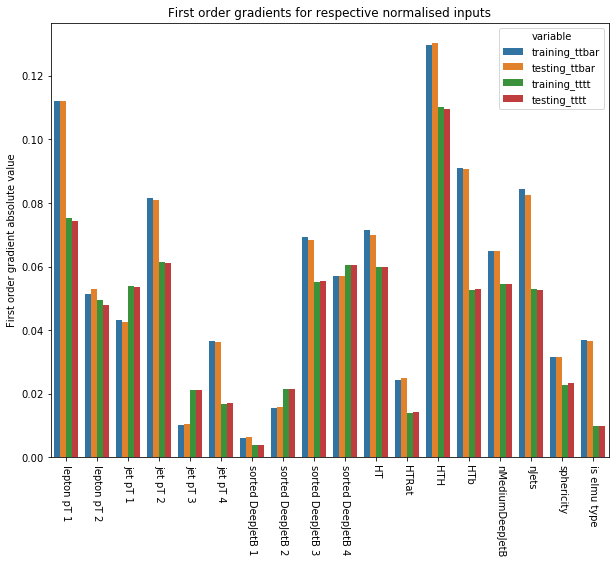

In [39]:
model = keras.models.load_model("v4_sorted_tanh/OSDL_keras_v4_sorted_tanh_combined-270-0.35.hdf5")
first_order_gradients_df = first_order_gradient(model, combined_variables_list_sorted)
plt.gca().set_xticklabels(formal_dictionary.values())

In [36]:
first_order_gradients_df["max"] = first_order_gradients_df.max(axis=1)
first_order_gradients_df[["combined_variables_list", "max"]].sort_values("max", ascending=False)

,combined_variables_list,max
12,HTH__nom,0.130195
0,FTALepton1_pt,0.111936
13,HTb__nom,0.090836
15,nFTAJet__nom,0.084450
3,FTAJet2__nom_pt,0.081574
10,HT__nom,0.071361
8,FTAJet3__nom_DeepJetB_sorted,0.069305
14,nMediumDeepJetB__nom,0.064949
9,FTAJet4__nom_DeepJetB_sorted,0.060494
2,FTAJet1__nom_pt,0.053954


In [12]:
def second_order_gradients(model, varlist, custom_tick_names=None):
    second_order_gradients_training_ttbar_df = pd.DataFrame(columns=[varlist])
    second_order_gradients_testing_ttbar_df = pd.DataFrame(columns=[varlist])
    second_order_gradients_training_tttt_df = pd.DataFrame(columns=[varlist])
    second_order_gradients_testing_tttt_df = pd.DataFrame(columns=[varlist])
    gradients = keras.backend.gradients(model.output, model.layers[1].output)
    #print(gradients)
    for i in range(len(varlist)):
        gradients_2 = keras.backend.gradients(gradients[0][:, i], model.layers[1].output)
        sess = keras.backend.get_session()
        second_order_gradients_training_ttbar = sess.run(gradients_2[0], feed_dict={model.input: training_ttbar})
        second_order_gradients_training_tttt  = sess.run(gradients_2[0], feed_dict={model.input: training_tttt})
        second_order_gradients_testing_ttbar = sess.run(gradients_2[0], feed_dict={model.input: testing_ttbar})
        second_order_gradients_testing_tttt  = sess.run(gradients_2[0], feed_dict={model.input: testing_tttt})

        second_order_gradients_mean_training_ttbar = second_order_gradients_training_ttbar.mean(axis=0)
        second_order_gradients_mean_training_tttt  = second_order_gradients_training_tttt.mean(axis=0)
        second_order_gradients_mean_testing_ttbar = second_order_gradients_testing_ttbar.mean(axis=0)
        second_order_gradients_mean_testing_tttt  = second_order_gradients_testing_tttt.mean(axis=0)

        second_order_gradients_training_ttbar_df[varlist[i]] = abs(second_order_gradients_mean_training_ttbar)
        second_order_gradients_testing_ttbar_df[varlist[i]]  = abs(second_order_gradients_mean_testing_ttbar)
        second_order_gradients_training_tttt_df[varlist[i]] = abs(second_order_gradients_mean_training_tttt)
        second_order_gradients_testing_tttt_df[varlist[i]]  = abs(second_order_gradients_mean_testing_tttt)
    
    #return second_order_gradients_training_ttbar_df

    plt.figure(figsize=(10, 8), facecolor="white")
    if custom_tick_names == None: sns.heatmap(second_order_gradients_training_ttbar_df, yticklabels=varlist, cmap="viridis")
    else: sns.heatmap(second_order_gradients_training_ttbar_df, cmap="viridis", \
                      xticklabels=custom_tick_names, yticklabels=custom_tick_names)
    plt.title("Second derivative absolute value for respective normalised inputs, training ttbar")  

    plt.figure(figsize=(10, 8), facecolor="white")
    if custom_tick_names == None: sns.heatmap(second_order_gradients_testing_ttbar_df, yticklabels=varlist, cmap="viridis")
    else: sns.heatmap(second_order_gradients_testing_ttbar_df, cmap="viridis", \
                      xticklabels=custom_tick_names, yticklabels=custom_tick_names)
    plt.title("Second derivative absolute value for respective normalised inputs, testing ttbar")

    plt.figure(figsize=(10, 8), facecolor="white")
    if custom_tick_names == None: sns.heatmap(second_order_gradients_training_tttt_df, yticklabels=varlist, cmap="viridis")
    else: sns.heatmap(second_order_gradients_training_tttt_df, cmap="viridis", \
                      xticklabels=custom_tick_names, yticklabels=custom_tick_names)
    plt.title("Second derivative absolute value for respective normalised inputs, training tttt")

    plt.figure(figsize=(10, 8), facecolor="white")
    if custom_tick_names == None: sns.heatmap(second_order_gradients_testing_tttt_df, yticklabels=varlist, cmap="viridis")
    else: sns.heatmap(second_order_gradients_testing_tttt_df, cmap="viridis", \
                      xticklabels=custom_tick_names, yticklabels=custom_tick_names)
    plt.title("Second derivative absolute value for respective normalised inputs, testing tttt")

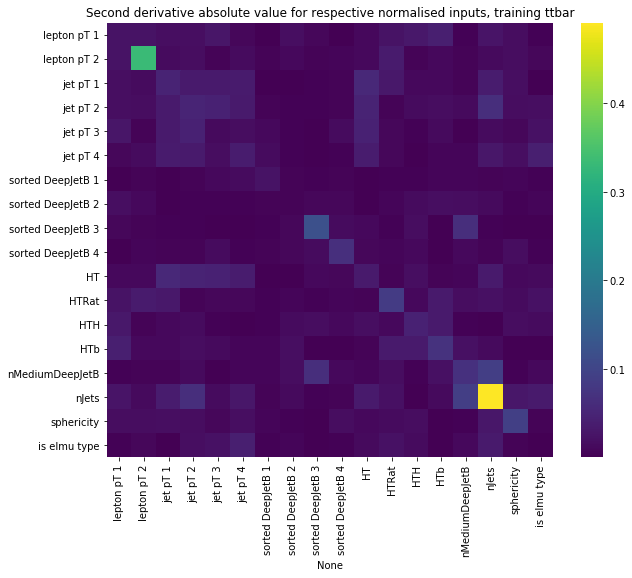

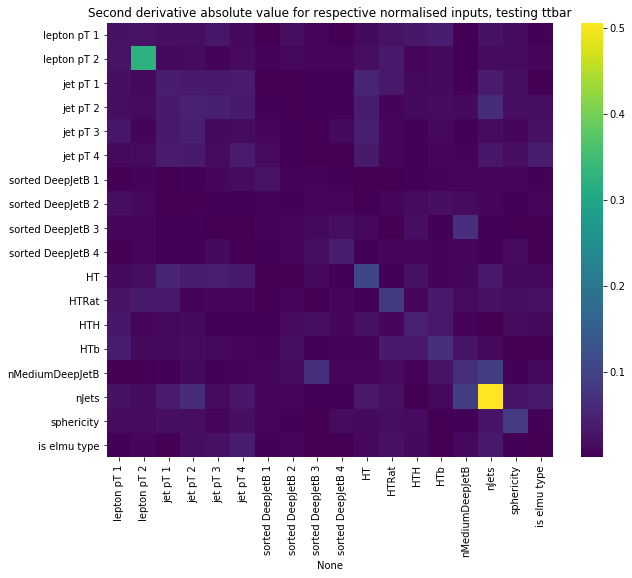

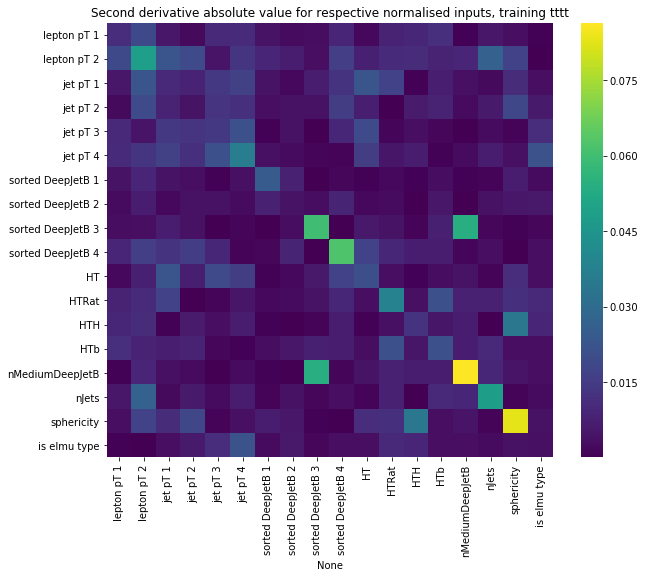

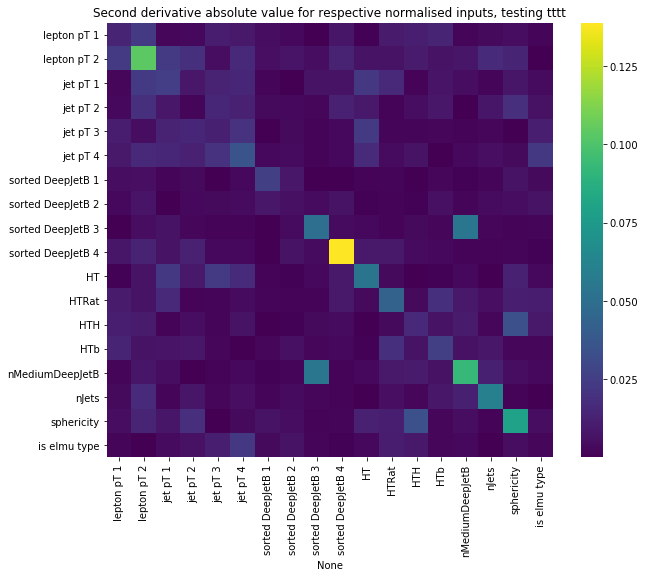

In [11]:
model = keras.models.load_model("v4_sorted_tanh/OSDL_keras_v4_sorted_tanh_combined-270-0.35.hdf5")
second_order_gradients(model, combined_variables_list_sorted, custom_tick_names=formal_dictionary.values())